## Assignment 2: Linear Regression Analysis of Years of Experience and Salary （20 marks）

**Background:**
Suppose a company has collected data on its employees, including their years of experience and corresponding salaries. The goal is to analyze the relationship between years of experience and salary using linear regression and predict future salaries based on this relationship.

**Task Description:**
1. You will be provided with a CSV file containing two columns:
   - **Years of Experience**: The number of years an employee has worked.
   - **Salary**: The salary of the employee.
   
2. Complete the code in the blanks to accomplish the following tasks:
   - **Split Dataset**: Split the given dataset into training and testing sets.
   - **Initialization and Plotting**: Initialize parameters for linear regression and visualize the dataset.
   - **Gradient Descent**: Implement the gradient descent algorithm to optimize the slope and bias.
   - **Result Plotting**: Plot the fitted regression line along with the training and testing data.
   - **Analysis**: Find out what can be improved and enhanced in the given program.


### Task 1. Split Dataset (2 marks)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_df = pd.read_csv("Salary_dataset.csv") # Import the Salary dataset.
X = data_df["YearsExperience"].to_numpy()   # Separate data into features and labels
y = data_df["Salary"].to_numpy()

    
# Divide the dataset into training and test data in a ratio of 2:1 (2 marks)
train_split = int((2/3) * len(data_df))
train_X, train_y = X[:train_split], y[:train_split] 
test_X, test_y = X[train_split:], y[train_split:]

print(f"train:{train_X.shape, train_y.shape}")
print(f"test:{test_X.shape, train_y.shape}")

train:((20,), (20,))
test:((10,), (20,))


### Task 2. Initialization and Plotting (4 marks)

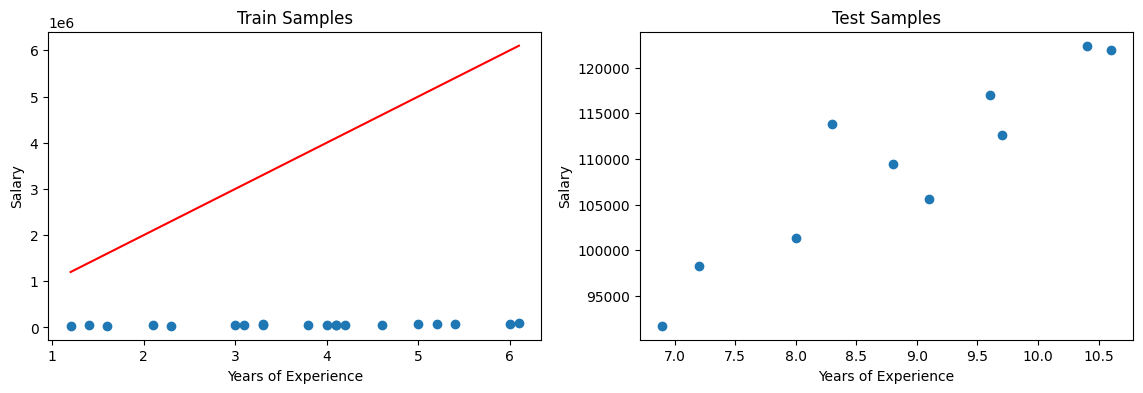

In [10]:
slope = 1000.0
bias = 1000.0
y_pred = train_X * slope * bias    # Calculate y_pred based on training feature and weights (1 mark)

plt.figure(figsize=[14,4])

plt.subplot(1,2,1)
plt.title("Train Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(train_X, train_y)        # Draw the training samples in the figure (1 mark)   
plt.plot(train_X, y_pred, c="red")  # Draw the initialized line in the figure (1 mark)


plt.subplot(1,2,2)
plt.title("Test Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(test_X, test_y)  # Draw the test samples in the figure (1 mark)

### Task 3. Gradient Descent (10 marks)

In [11]:
alpha=0.0001         # Initialize the learning rate  

y_pred_list = []

for iteration in range(500000):
    
    # Calculate y_pred for each iteration (2 mark)
    y_pred = train_X * slope + bias
    y_pred_list.append(y_pred)
    
    
    # Update the slope and bias using Gradient Descent (8 marks)

    #find the gradient of W by calculate the gradient of Loss with respect to Weight here (dl/dw)
    error = y_pred - train_y

    slope_gradient = 2 * np.mean(error * train_X)

    # find the gradient of b by calculate the gradient of Loss with respect to Bias here (dl/db)

    bias_gradient = 2 * np.mean(error)

    # update the slope here
    slope -= (slope_gradient * alpha)

    # update the bias here
    bias -= (bias_gradient * alpha)
    

### Task 4. Result Plotting (2 marks)

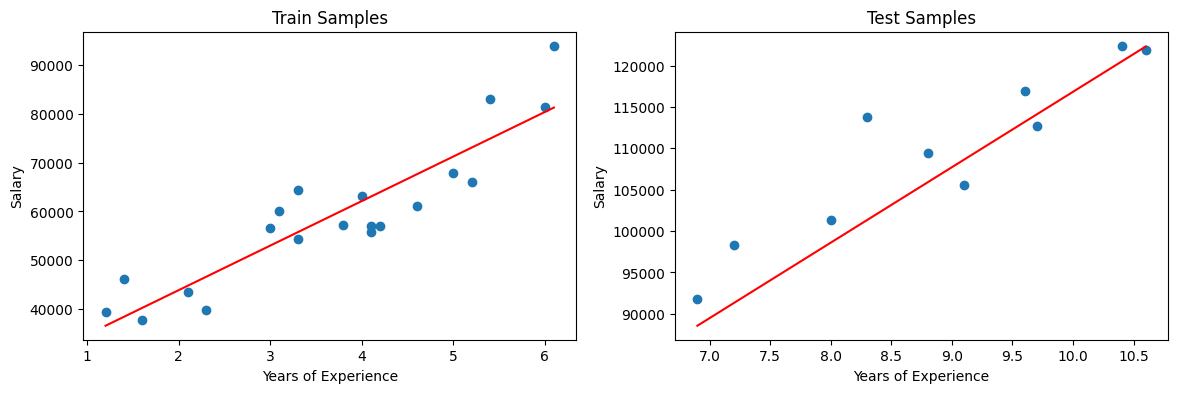

In [12]:
plt.figure(figsize=[14,4])

plt.subplot(1,2,1)
plt.title("Train Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(train_X, train_y, label="Train Data")        # Draw the training samples in the figure
plt.plot(train_X, slope * train_X + bias, c="red")  # Draw the optimalized line in the figure (1 mark)

plt.subplot(1,2,2)
plt.title("Test Samples")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(test_X, test_y, label="Test Data")        # Draw the test samples in the figure
plt.plot(test_X, slope * test_X + bias, c="red")  # Draw the optimalized line in the figure (1 mark)
plt.show()


### Task 5. Analysis (2 marks)
#### There is a flaw in the process given above, any improvements you think could be made to the above code? (text answer)

Normalizing the dataset of salary and years of experience would improve model performance. This is because the range of salary values is much larger than years of experience which caused poor convergence and biased weights. As a result, it caused the machine learning to not predict well as it only predicts salary based only on salary.